OPTIMIZING ENVIRONMENTAL DATA PREDICTION USING XGBOOST: A CASE STUDY ON CAMPBELL CR1000 WEATHER STATION.
   - George Jeff Onyango

Extreme Gradient Boosting (XGBoost) is a powerful machine learning algorithm that can be highly effective for environmental data prediction, including weather forecasting from Campbell CR1000 weather stations. XGBoost excels at handling large datasets, optimizing feature selection, and improving predictive accuracy. In XGBoost each new tree corrects the errors made by the previous one. It uses advanced optimization techniques and regularization methods that reduce overfitting and improve model performance.

The data from the Campbell CR1000 weather station was logged daily at an interval of 30 minutes between 07/10/2022 to 25/03/2025. The model tries to predict the environmental data such as soil temperature, atmospheric temperature, and relative humidity between 02/06/2025 to 31/12/2025. 

In [76]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Load the file (skip first 3 metadata rows)
df_clean = pd.read_csv(r"E:\TERRA DATA\Campbell_weather_stn\CR1000_Table1_25_march.csv", skiprows=3)

# Rename columns based on your dataset
df_clean.columns = [
    "TIMESTAMP", "RECORD", "RH_Avg", "BP_mbar", "AirTC_Avg", "RH_2", "Rain_mm_Tot",
    "BP_mbar_Avg", "SHF_Avg", "NR_Wm2_Avg", "VWC10_Avg", "VWC30_Avg", "VWC50_Avg",
    "temperature10_Avg", "temperature30_Avg", "temperature50_Avg"
]

#  Convert timestamp and numeric columns
df_clean["TIMESTAMP"] = pd.to_datetime(df_clean["TIMESTAMP"], errors='coerce')
for col in df_clean.columns[1:]:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Check if df_clean is valid
if df_clean is not None and not df_clean.empty:
    # Step 5: Resample to daily average
    df_daily = df_clean.resample('D', on='TIMESTAMP').mean()
    print(df_daily.head())
else:
    print("DataFrame is empty or not loaded properly.")


            RECORD     RH_Avg     BP_mbar  AirTC_Avg       RH_2  Rain_mm_Tot  \
TIMESTAMP                                                                      
2022-10-07    10.5  55.173750  785.168525  19.537500  56.106875          0.0   
2022-10-08    42.5  62.395208  786.294492  17.763542  62.195833          0.0   
2022-10-09    90.5  59.123750  787.237708  17.340000  59.203333          0.0   
2022-10-10   138.5  63.339583  788.020487  17.308333  62.982917          0.0   
2022-10-11   186.5  61.338125  787.597408  17.031250  61.249375          0.0   

            BP_mbar_Avg    SHF_Avg  NR_Wm2_Avg  VWC10_Avg  VWC30_Avg  \
TIMESTAMP                                                              
2022-10-07   784.922188 -16.988250   -0.616875   0.254688   0.382063   
2022-10-08   786.262696   1.563333  136.588437   0.253646   0.380104   
2022-10-09   787.227779   6.457313  147.219458   0.252896   0.377938   
2022-10-10   788.017810   2.716917  131.440500   0.251083   0.376354   
2022-10

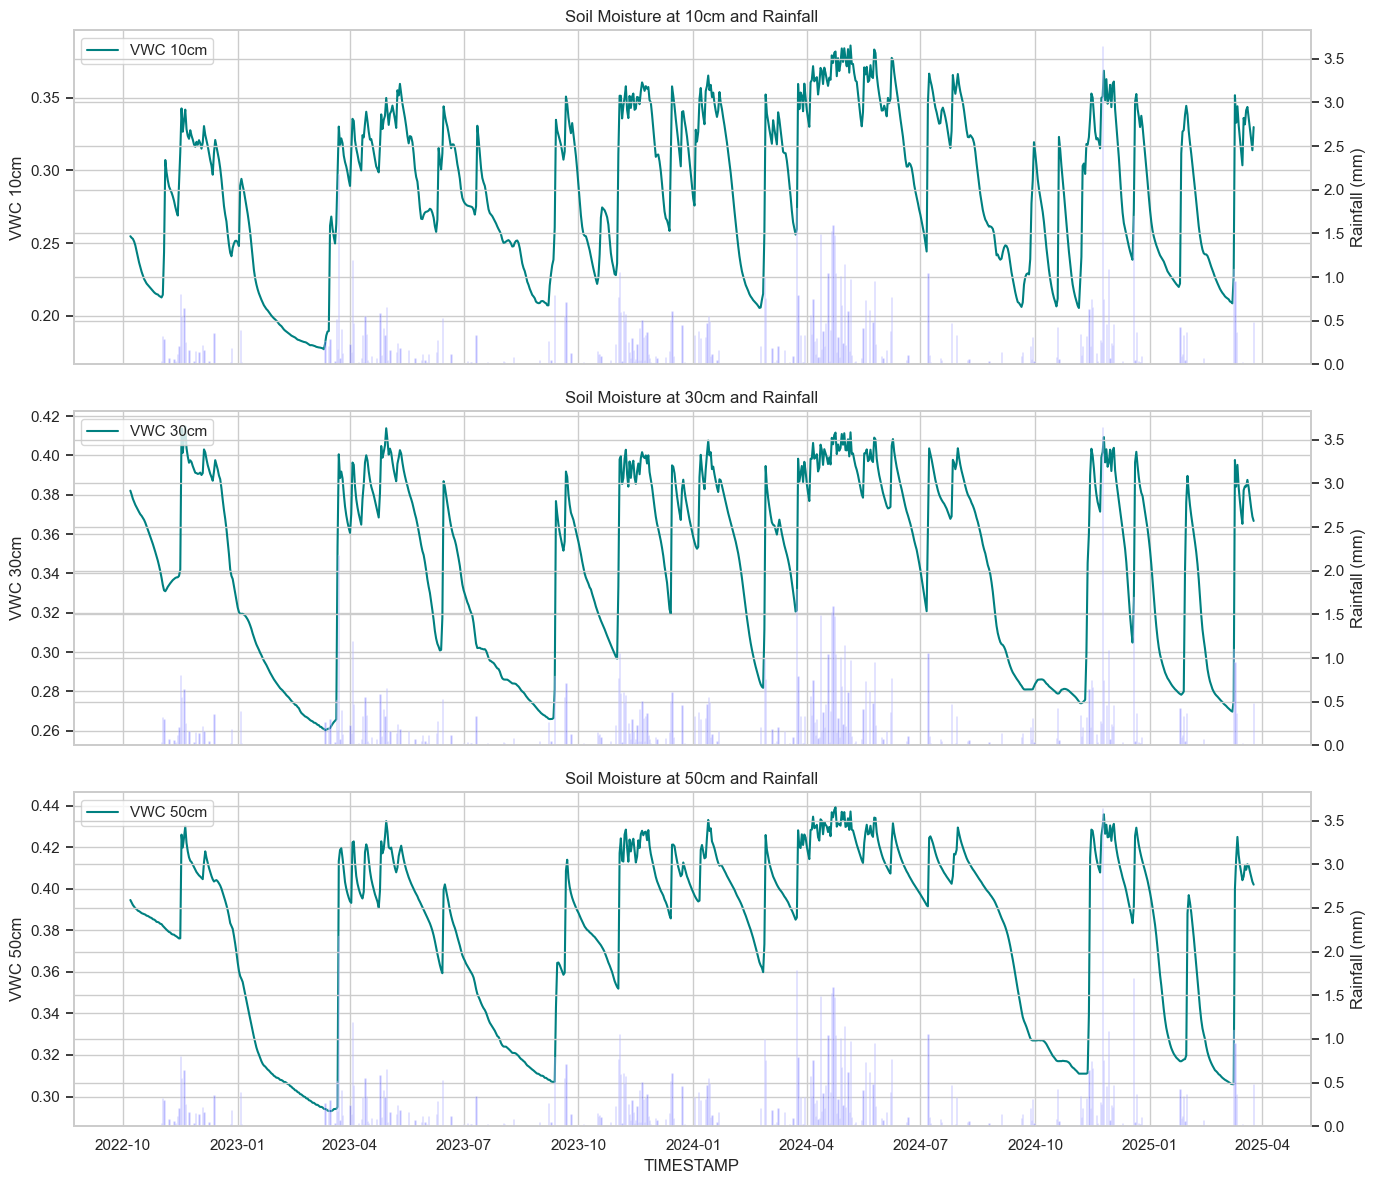

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Define depths
depths = ['10', '30', '50']

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

for i, depth in enumerate(depths):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # Lineplot for VWC
    sns.lineplot(
        ax=ax1, data=df_daily, x=df_daily.index, y=f'VWC{depth}_Avg',
        color='teal', label=f'VWC {depth}cm'
    )
    ax1.set_ylabel(f"VWC {depth}cm")
    ax1.legend(loc='upper left')

    # Bar plot for Rainfall
    ax2.bar(
        df_daily.index, df_daily['Rain_mm_Tot'],
        width=1.0, color='blue', alpha=0.3, label='Rainfall'
    )
    ax2.set_ylabel("Rainfall (mm)")
    ax1.set_title(f"Soil Moisture at {depth}cm and Rainfall")

# Format x-axis
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Where VWC_50, VWC_30, and VWC_10 are the Volumetric water content at 50cm, 30cm, and 10cm, respectively. VWC is the volume of water contained in a soil or porous medium per unit volume of soil. It’s usually expressed as a percentage or a decimal fraction.
VWC = Total Volume of Soil/Volume of Water.
VWC is used to model water movement in soil and groundwater recharge, affecting flood prediction, watershed management, and drought assessment. It also helps track soil drying or wetting cycles, which affect soil microbial activity, nutrient cycling, and erosion processes.

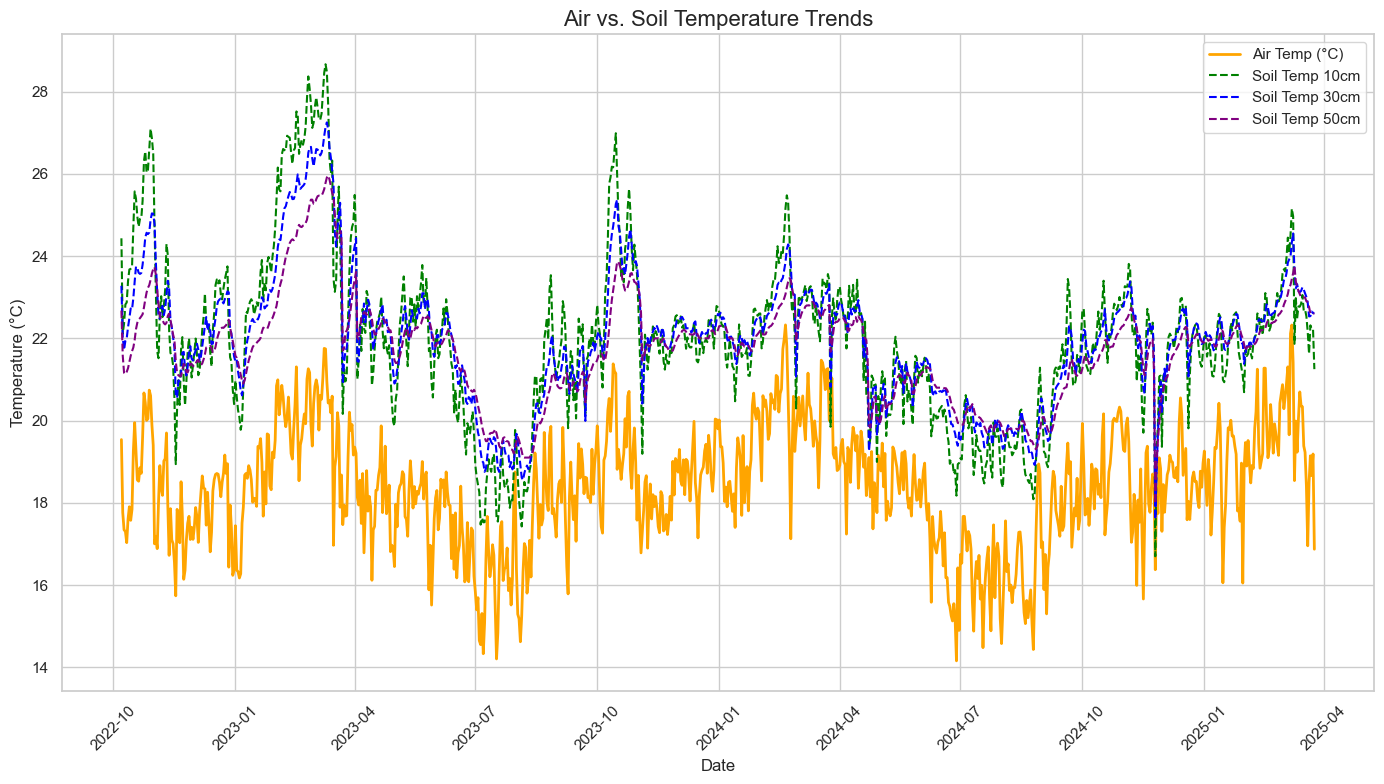

In [33]:


plt.figure(figsize=(14, 8))

# Plot air temperature
plt.plot(df_daily.index, df_daily['AirTC_Avg'], label='Air Temp (°C)', color='orange', linewidth=2)

# Plot soil temperatures at different depths
plt.plot(df_daily.index, df_daily['temperature10_Avg'], label='Soil Temp 10cm', color='green', linestyle='--')
plt.plot(df_daily.index, df_daily['temperature30_Avg'], label='Soil Temp 30cm', color='blue', linestyle='--')
plt.plot(df_daily.index, df_daily['temperature50_Avg'], label='Soil Temp 50cm', color='purple', linestyle='--')

# Formatting
plt.title("Air vs. Soil Temperature Trends", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Comparing air temperature with soil temperature at different depths gives insight into thermal dynamics, insulation effects, and how quickly the soil responds to atmospheric changes.

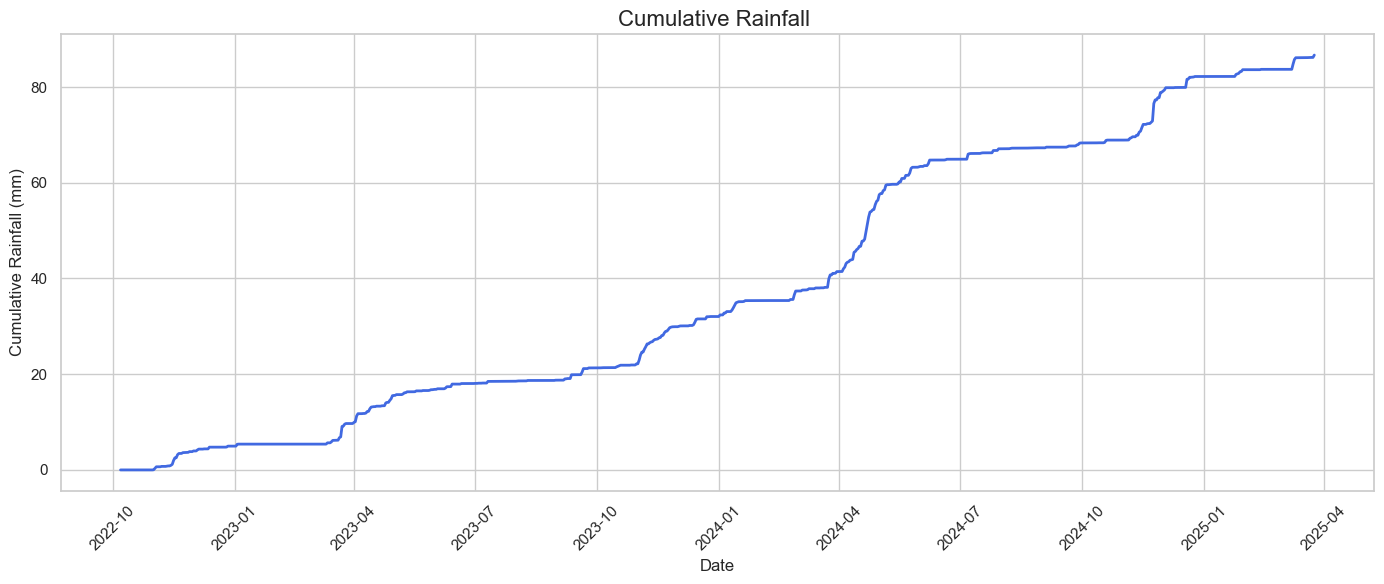

In [28]:
import matplotlib.pyplot as plt

# Compute cumulative rainfall
df_daily['Rainfall_Cumulative_mm'] = df_daily['Rain_mm_Tot'].cumsum()

# Plot cumulative rainfall
plt.figure(figsize=(14, 6))
plt.plot(df_daily.index, df_daily['Rainfall_Cumulative_mm'], color='royalblue', linewidth=2)
plt.title("Cumulative Rainfall ", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Cumulative Rainfall (mm)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cumulative rainfall is the total amount of rainfall accumulated over a specific period at a particular location. Instead of just measuring rainfall at a single moment or day, it sums up all rainfall amounts over days, weeks, or months. 

One of the significant uses of cumulative rainfall is its use in Flood Prediction and Management. Heavy cumulative rainfall over a short period can lead to flooding. Tracking cumulative totals helps predict flood risks. It also helps estimate groundwater recharge, surface runoff, and watershed health. Long-term cumulative rainfall trends help detect droughts or unusually wet periods.

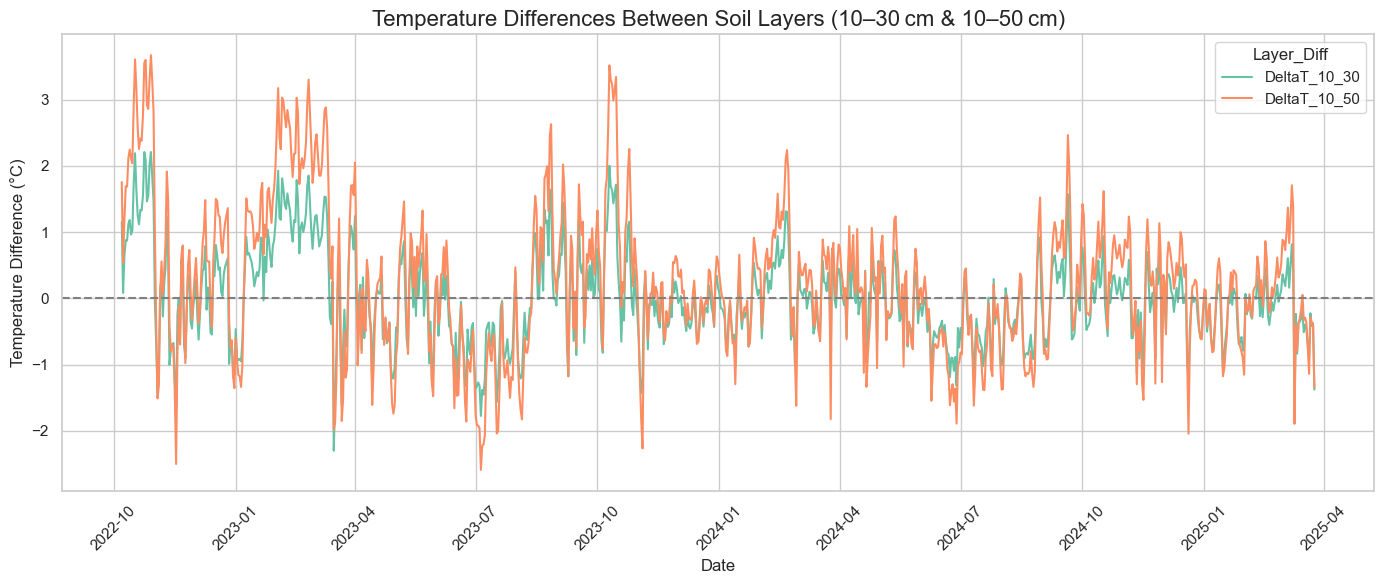

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate differences if not already done
df_daily['DeltaT_10_30'] = df_daily['temperature10_Avg'] - df_daily['temperature30_Avg']
df_daily['DeltaT_10_50'] = df_daily['temperature10_Avg'] - df_daily['temperature50_Avg']

# Melt dataframe for seaborn
df_temp_diff = df_daily[['DeltaT_10_30', 'DeltaT_10_50']].reset_index().melt(id_vars='TIMESTAMP', 
                                                                              var_name='Layer_Diff', 
                                                                              value_name='Temp_Diff')

# Plot with seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_temp_diff, x='TIMESTAMP', y='Temp_Diff', hue='Layer_Diff', palette='Set2')

plt.axhline(0, color='gray', linestyle='--')
plt.title("Temperature Differences Between Soil Layers (10–30 cm & 10–50 cm)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Temperature Difference (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


The upper soil layers (closer to the surface) are more influenced by atmospheric conditions such as solar radiation, air temperature, precipitation, and wind. Soil transfers heat downward through conduction, but this process slows with depth due to insulation and moisture content. Deeper soil layers change temperature more slowly and tend to have less daily and seasonal temperature variation.

10–30 cm Layer: This shallow layer experiences relatively fast temperature fluctuations responding to daily weather changes and seasonal shifts. Temperatures here can be quite dynamic. Understanding the temperature gradient is important for modeling soil processes, including freeze-thaw cycles, organic matter decomposition, and soil carbon dynamics.






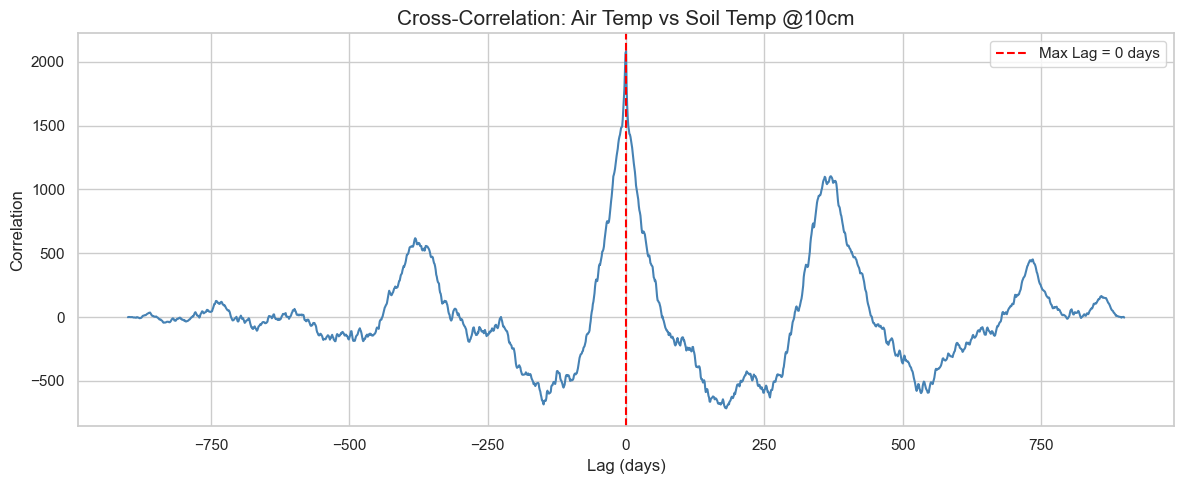

Estimated lag: 0 day(s) — soil at 10 cm lags behind air temperature by approx. 0 day(s).


In [43]:
import numpy as np
import seaborn as sns

# Prepare aligned arrays
air = df_daily['AirTC_Avg'].dropna()
soil = df_daily['temperature10_Avg'].dropna()
min_len = min(len(air), len(soil))
air = air[:min_len]
soil = soil[:min_len]

# Cross-correlation
correlation = np.correlate(air - air.mean(), soil - soil.mean(), mode='full')
lags = np.arange(-len(air) + 1, len(soil))
max_lag = lags[np.argmax(correlation)]

# Apply Seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(x=lags, y=correlation, color='steelblue')
plt.axvline(max_lag, color='red', linestyle='--', label=f'Max Lag = {max_lag} days')
plt.title("Cross-Correlation: Air Temp vs Soil Temp @10cm", fontsize=15)
plt.xlabel("Lag (days)")
plt.ylabel("Correlation")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Estimated lag: {max_lag} day(s) — soil at 10 cm lags behind air temperature by approx. {abs(max_lag)} day(s).")


The deeper you measure soil temperature, the longer the lag. The lag between air temperature and soil temperature is zero; this means the soil temperature changes at the same time as the air temperature, with no noticeable delay. This can be as a result of bare soils that are warmed quickly by sunlight and air, showing immediate temperature response. Also, at shallow surfaces, soil temperature often responds almost instantly to air temperature changes, because the heat transfer distance is minimal.



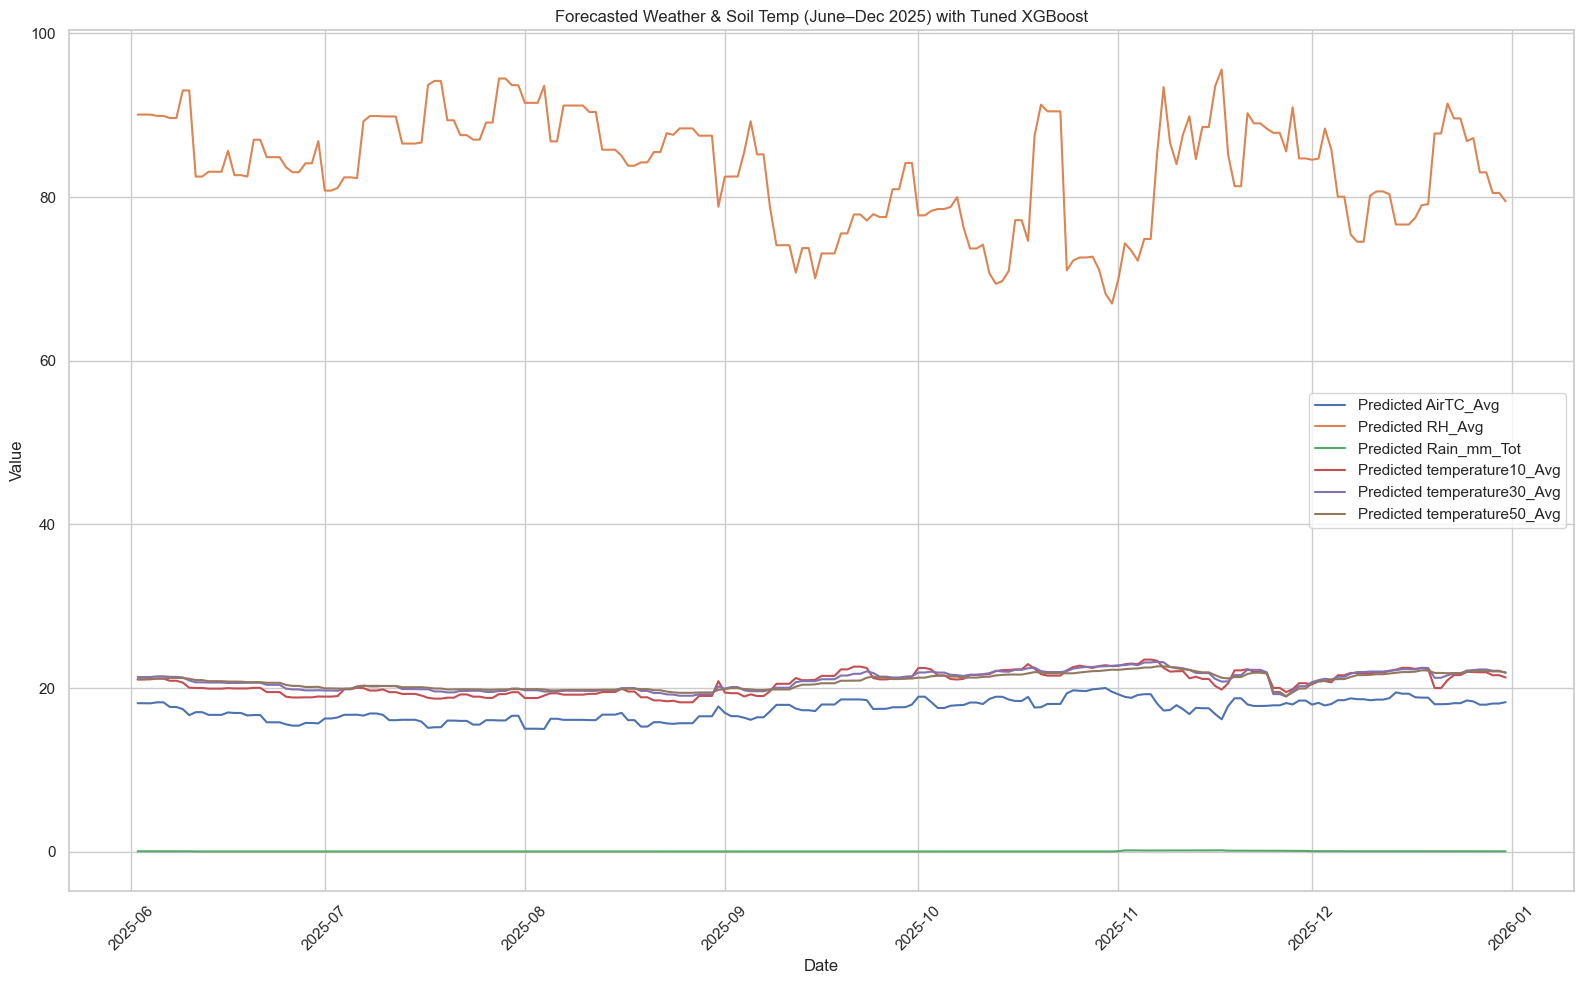

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

# Additional targets for soil temperature
targets = ['AirTC_Avg', 'RH_Avg', 'Rain_mm_Tot', 'temperature10_Avg', 'temperature30_Avg', 'temperature50_Avg']

# Drop rows with missing target values
df_model = df_daily.dropna(subset=targets)

# Redefine features
features = ['dayofyear', 'month', 'year']
X = df_model[features]
y = df_model[targets]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Train tuned XGBoost models
models = {}
for target in targets:
    xgb = XGBRegressor(random_state=42, verbosity=0)
    search = RandomizedSearchCV(xgb, param_distributions=param_dist,
                                n_iter=20, scoring='neg_mean_squared_error',
                                cv=3, verbose=0, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train[target])
    models[target] = search.best_estimator_

# Prepare future dates
future_dates = pd.date_range(start='2025-06-02', end='2025-12-31')
df_future = pd.DataFrame({
    'TIMESTAMP': future_dates,
    'dayofyear': future_dates.dayofyear,
    'month': future_dates.month,
    'year': future_dates.year
})
X_future = df_future[features]

# Generate future predictions
for target in targets:
    df_future[f'Pred_{target}'] = models[target].predict(X_future)

# Plot forecasts
plt.figure(figsize=(16, 10))
for target in targets:
    sns.lineplot(data=df_future, x='TIMESTAMP', y=f'Pred_{target}', label=f'Predicted {target}')
plt.title("Forecasted Weather & Soil Temp (June–Dec 2025) with Tuned XGBoost")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In the XGBoost model, hyperparameter tuning was conducted to reduce overfitting and improve the accuracy of the model. Hyperparameter tuning or optimization is the process of choosing the right set of hyperparameters for a Machine Learning algorithm. It is a very important task in any Machine Learning use case. These parameters have to be specified manually to the algorithm and fixed through a training pass.

In the model, RandomizedSearchCV is implemented. RandomizedSearchCV is a technique used in machine learning for hyperparameter tuning — that is, automatically finding the best combination of model parameters to improve performance. It randomly samples a fixed number of hyperparameter combinations from specified ranges or distributions. Then it evaluates each sampled combination using cross-validation to estimate model performance.
Finally, it picks the best-performing hyperparameter set. It is much faster with large datasets compared to GridSearch.

In [67]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to evaluate regression predictions
def evaluate_regression(true, pred, label):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred)
    print(f"{label} Evaluation:")
    print(f"  MAE: {mae:.3f}")
    print(f"  MSE: {mse:.3f}")
    print(f"  R^2: {r2:.3f}")
    print("")

# Evaluate each target on the test set
for target in models:
    y_pred = models[target].predict(X_test)
    evaluate_regression(y_test[target], y_pred, target)


AirTC_Avg Evaluation:
  MAE: 0.635
  MSE: 0.658
  R^2: 0.673

RH_Avg Evaluation:
  MAE: 3.868
  MSE: 25.871
  R^2: 0.677

Rain_mm_Tot Evaluation:
  MAE: 0.139
  MSE: 0.125
  R^2: 0.055

temperature10_Avg Evaluation:
  MAE: 0.463
  MSE: 0.397
  R^2: 0.887

temperature30_Avg Evaluation:
  MAE: 0.260
  MSE: 0.154
  R^2: 0.929

temperature50_Avg Evaluation:
  MAE: 0.134
  MSE: 0.054
  R^2: 0.964



Soil temperature models are very strong, especially at deeper layers (R² > 0.92).  Air temperature and humidity models perform reasonably well. Rainfall prediction is weak. This is typical — rainfall is highly variable and harder to model with basic features like date/month alone.
 
- RH_AVg - Average relative humidity.
- AirTC_AVg - Average air temperature.
- Rain_mm_Tot Evaluation - Total rainfall.
- temperature10_Avg Evaluation -Average temperaturee at 10cm soil depth.
- temperature30_Avg Evaluation -Average temperaturee at 30cm soil depth.
- temperature50_Avg Evaluation -Average temperaturee at 50cm soil depth.
 
- MAE - Mean Absolute Error
- MSE - Mean Squared Error
- R^2 - R-squared (Coefficient)